## Random Forest


#### Data Preprocessing


In [152]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #this will be used for data visualisation
import seaborn as sns #this will be used for more statistics intensive data visualisation
%matplotlib inline

In [153]:
df = pd.read_csv(r"D:\Downloads\Cleaned_Student_Performance_data.csv")
df.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,15.408756,0,0,1,0,0,0,0,1
1,4.210570,26,0,2,0,0,0,0,4
2,10.028829,14,0,3,1,0,0,0,3
3,4.672495,17,1,3,0,0,0,0,4
4,8.191219,0,0,1,1,0,0,0,1


In [154]:
df['GradeClass'].value_counts()
#this variable is categorical in nature - our target variable

GradeClass
4    872
3    280
2    270
1    153
0     50
Name: count, dtype: int64

#### Missing Value Treatment

In [155]:
df.isnull().sum()
#this show us that our dataset has no missing values

StudyTimeWeekly    0
Absences           0
Tutoring           0
ParentalSupport    0
Extracurricular    0
Sports             0
Music              0
Volunteering       0
GradeClass         0
dtype: int64

In [156]:
X = df.drop(['GradeClass'], axis=1)

y = df['GradeClass']
#this is where we declare our feature and target variables

from sklearn.model_selection import train_test_split # this is where we split our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape # this is where we check how many data points fall into the training and testing sets respectively


((1088, 8), (537, 8))

#### Model Training and Fitting

In [157]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(random_state=0) # thisis where we instantiate the classifier


rfc.fit(X_train, y_train)#this is where we fit the data


y_pred = rfc.predict(X_test)#this is where we set a prediction of the outcome

from sklearn.metrics import accuracy_score #this is where we chech the accuracy score 
#the default number of decision trees in the random forest classifier is 10 hence the following statement

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7877


In [158]:
#here we will repeat the steps above but increase the number of trees to see the impact on accuracy
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))
#the accuracy doesnt increase with more trees so that means the model reached optimality. to test this, we'll now decrease the number of trees

Model accuracy score with 100 decision-trees : 0.7877


In [159]:
#here we will repeat the steps above but decrease the number of trees to see the impact on accuracy
rfc_1 = RandomForestClassifier(n_estimators=1, random_state=0)

rfc_1.fit(X_train, y_train)

y_pred_1 = rfc_1.predict(X_test)

print('Model accuracy score with 1 decision-tree : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))
#as expected, the score decreased. the model has reached optimality with 10 trees.

Model accuracy score with 1 decision-tree : 0.6667


In [160]:
# this is where we actually create our model with 10 estimators
clf = RandomForestClassifier(n_estimators=10, random_state=0)



#this is where we fit the model to our training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

#### Model Evaluation

In [161]:
#now, we will check our feature scores(this tells us how much each feature reduces impurity in our forest)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Absences           0.599834
StudyTimeWeekly    0.246488
ParentalSupport    0.079930
Tutoring           0.027863
Extracurricular    0.024264
Sports             0.021622
Music              0.000000
Volunteering       0.000000
dtype: float64

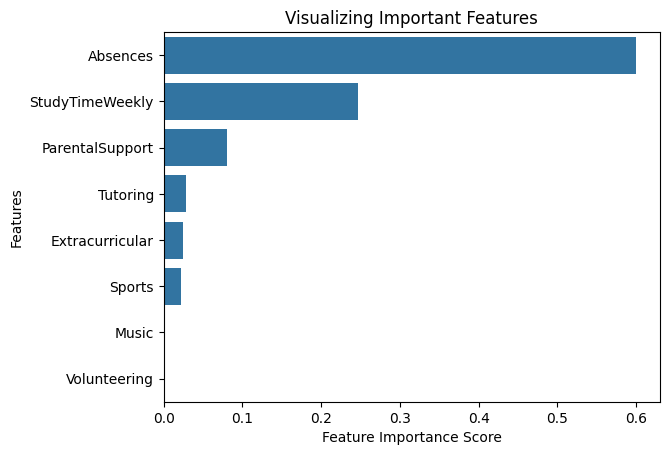

In [162]:
#we will now visualise the feature scores
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [163]:
#we will now drop volunteering as the least important feature, rebuild the model, and see its effect on accuracy
X = df.drop(['GradeClass', 'Volunteering'], axis=1)

y = df['GradeClass']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with the Volunteering variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#we anticipate that the removal of volunteering has improved our accuracy but only marginally hence there is no change in our accuracy score

Model accuracy score with the Volunteering variable removed : 0.7877


In [164]:
#we will now drop music as the second least important feature, rebuild the model, and see its effect on accuracy
X = df.drop(['GradeClass', 'Volunteering', 'Music'], axis=1)

y = df['GradeClass']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with the Music variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#we anticipate that the removal of music has improved our accuracy but only marginally hence there is no change in our accuracy score

Model accuracy score with the Music variable removed : 0.7877


#### Confusion Matrix and Classification Report

In [165]:
#we will now introduce a confusion matrix to assess and summarise the perfomance of our classification algorithm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
#the following matrix shows a high ratio of true positives(553) to False negatives(228)[AKA type ii errors]
#class 4 is our best predicted.


Confusion matrix

 [[  3   8   0   0   0]
 [  6  33  14   2   0]
 [  0   6  56  15   0]
 [  0   0  21  53  19]
 [  0   0   1  22 278]]


In [166]:
#finally, we culminate with a classification report to show the most important values
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        11
           1       0.70      0.60      0.65        55
           2       0.61      0.73      0.66        77
           3       0.58      0.57      0.57        93
           4       0.94      0.92      0.93       301

    accuracy                           0.79       537
   macro avg       0.63      0.62      0.62       537
weighted avg       0.79      0.79      0.79       537

